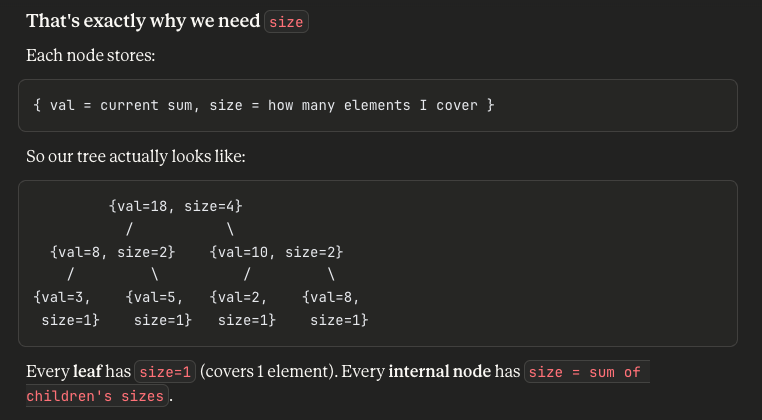
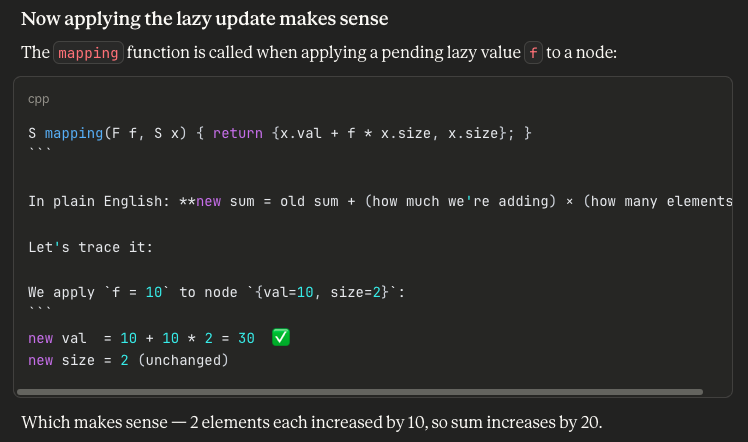
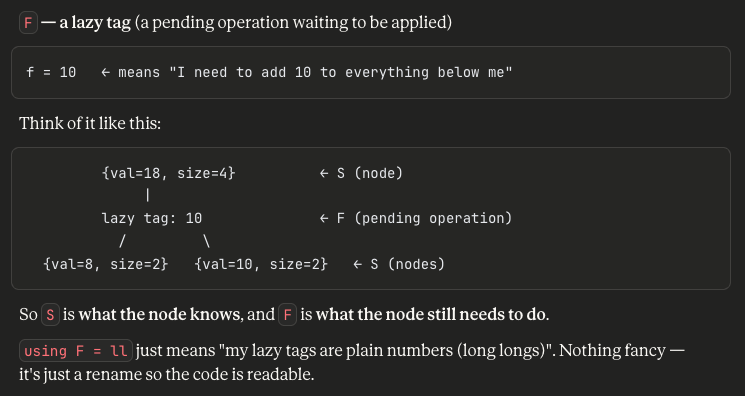
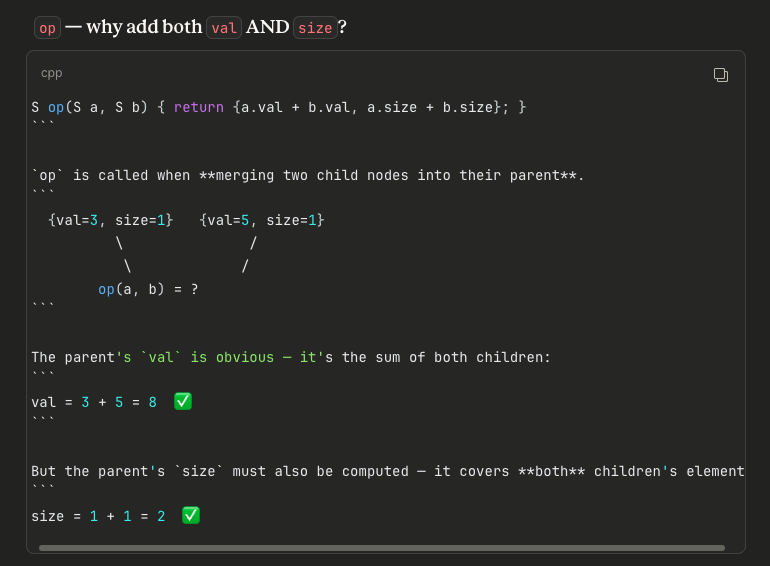
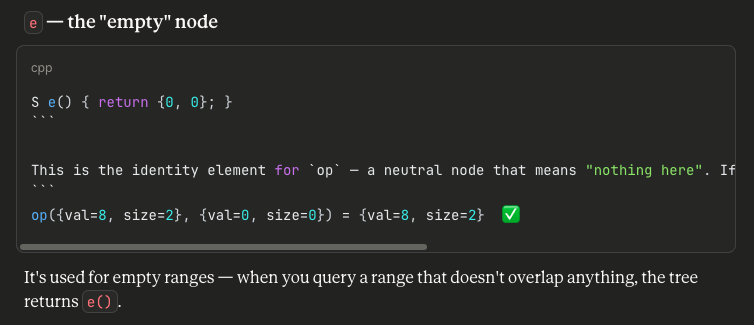
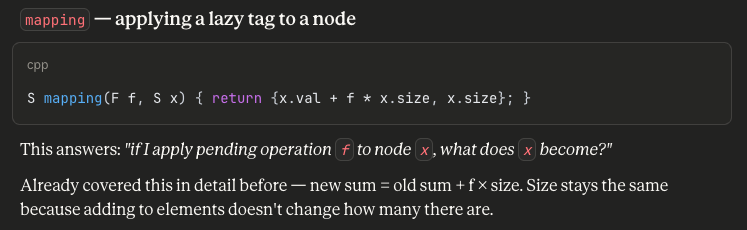
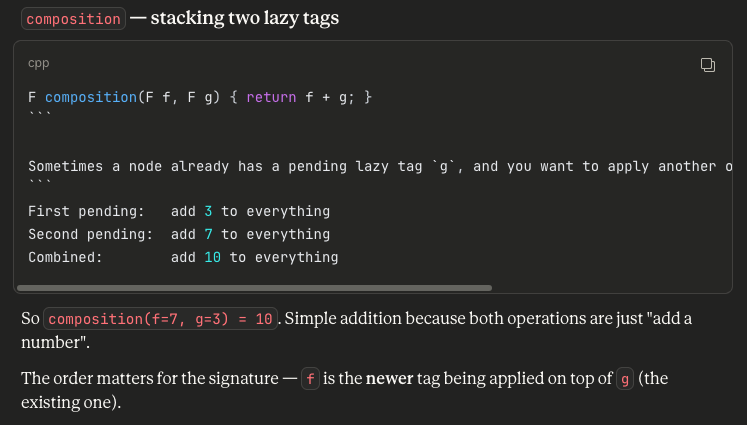

```cpp
struct S
{
  ll val;
  ll size;
};
S op(S a, S b) { return {a.val + b.val, a.size + b.size}; }
S e() { return {0, 0}; } // Defines the identity element for the op in segment tree (0 for sum, 0 for xor, 0 for GCD, 1 for LCM, 1 for multiplication, INF for min, -INF for max).

using F = ll;
S mapping(F f, S x) { return {x.val + f * x.size, x.size}; } // if apply pending operation f to node x, what does it become
F composition(F f, F g) { return f + g; } // combined effect of applying 'f' lazy tag on op of already pending lazy tag `g`
F id() { return 0; } // Defines the identity element for mapping



using namespace atcoder;
int main()
{
  nyan;
  ll N, Q;
  cin >> N >> Q;
  vll C(N);
  cin >> C;
  
  lazy_segtree<S, op, e, F, mapping, composition, id> seg(N);
  for (int i = 0; i < N; i++)
    seg.set(i, {C[i], 1});

  foi(0, Q)
  {
    int type;
    cin >> type;
    if (type == 1)
    {
      ll l, r, v;
      cin >> l >> r >> v;
      l--;
      seg.apply(l, r, v);
    }
    else
    {
      ll l, r;
      cin >> l >> r;
      l--;
      cout << seg.prod(l, r).val << endl;
    }
  }
}
```


## All combinations

### Range Sum + Range Add
```cpp
S op(S a, S b) { return {a.val + b.val, a.size + b.size}; }
S e() { return {0, 0}; }
S mapping(F f, S x) { return {x.val + f * x.size, x.size}; }
F composition(F f, F g) { return f + g; }
F id() { return 0; }
```

### Range Min + Range Add
```cpp
S op(S a, S b) { return {min(a.val, b.val), a.size + b.size}; }
S e() { return {LLONG_MAX, 0}; }
S mapping(F f, S x) { return {x.val + f, x.size}; }
F composition(F f, F g) { return f + g; }
F id() { return 0; }
```

### Range Max + Range Add
```cpp
S op(S a, S b) { return {max(a.val, b.val), a.size + b.size}; }
S e() { return {LLONG_MIN, 0}; }
S mapping(F f, S x) { return {x.val + f, x.size}; }
F composition(F f, F g) { return f + g; }
F id() { return 0; }
```

### Range Min + Range Set
```cpp
// LLONG_MIN used as sentinel meaning "no pending set"
S op(S a, S b) { return {min(a.val, b.val), a.size + b.size}; }
S e() { return {LLONG_MAX, 0}; }
S mapping(F f, S x) { return {f == LLONG_MIN ? x.val : f, x.size}; }
F composition(F f, F g) { return f == LLONG_MIN ? g : f; }  // newer set overrides older
F id() { return LLONG_MIN; }
```

### Range Sum + Range Set
```cpp
S op(S a, S b) { return {a.val + b.val, a.size + b.size}; }
S e() { return {0, 0}; }
S mapping(F f, S x) { return {f == LLONG_MIN ? x.val : f * x.size, x.size}; }
F composition(F f, F g) { return f == LLONG_MIN ? g : f; }
F id() { return LLONG_MIN; }
```

### Range XOR + Range XOR Update
```cpp
S op(S a, S b) { return {a.val ^ b.val, a.size + b.size}; }
S e() { return {0, 0}; }
S mapping(F f, S x) { return {x.val ^ f, x.size}; }
F composition(F f, F g) { return f ^ g; }  // two XORs cancel/combine
F id() { return 0; }
```

### Range GCD + Range Set
```cpp
// gcd(0, x) = x so 0 is the identity for GCD
S op(S a, S b) { return {__gcd(a.val, b.val), a.size + b.size}; }
S e() { return {0, 0}; }
S mapping(F f, S x) { return {f == LLONG_MIN ? x.val : f, x.size}; }
F composition(F f, F g) { return f == LLONG_MIN ? g : f; }
F id() { return LLONG_MIN; }
```

### Range LCM + Range Set
```cpp
// lcm(1, x) = x so 1 is the identity for LCM
S op(S a, S b) { return {lcm(a.val, b.val), a.size + b.size}; }
S e() { return {1, 0}; }
S mapping(F f, S x) { return {f == LLONG_MIN ? x.val : f, x.size}; }
F composition(F f, F g) { return f == LLONG_MIN ? g : f; }
F id() { return LLONG_MIN; }
```

### Range Product + Range Multiply
```cpp
S op(S a, S b) { return {a.val * b.val, a.size + b.size}; }
S e() { return {1, 0}; }
S mapping(F f, S x) { return {x.val * f, x.size}; }
F composition(F f, F g) { return f * g; }
F id() { return 1; }
```
